# Modelos AR, MA, ARMA, ARIMA



por **Cibele Russo**


por **Cibele Russo**

Baseado em 

- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- EHLERS, R.S. Análise de Séries Temporais. ICMC USP. 2009.

Implementações:

- BROWNLEE, J. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras adicionais:

- BOX, G. E., & JENKINS, G. M. Time series analysis: Forecasting and control. San Francisco. Calif: Holden-Day. 1976.

- BOX, G. E., & JENKINS, G. M., & REINSEL, G. C. Time series analysis, forecasting and control. Englewood Clifs. 1994.

- HYNDMAN, R. J., ATHANASOPOULOS, G.; Forecasting: principle and practice: O Texts; 2nd edition. 2018. Acesso em 09/07/2022.

- https://otexts.com/fpp2/AR.html
- https://otexts.com/fpp2/MA.html
- https://otexts.com/fpp2/non-seasonal-arima.html

- https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.html



# Modelos ARIMA (p,d,q)

**Componentes de um modelo ARIMA:**

- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio

- **Integrado (d)**: Diferenças para tornar a série estacionária

- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.


**SARIMA: ARIMA com sazonalidade.**



Abordagem de Box e Jenkins (1976): Ajustar modelos autorregressivos integrados de médias móveis, ARIMA(p,d,q) a um conjunto de dados. Veja também Box et al. (1994).

Uma estratégia para a construção do modelo será baseada em um ciclo iterativo, na qual a escolha da estrutura do modelo é baseada nos próprios dados:

1. Uma classe geral de modelos é considerada para a análise, no caso modelos ARIMA (***especificação***)

2. Há ***identificação*** do modelo, com base na análise de autocorrelações, autocorrelações parciais e outros critérios

3. ***Estimação*** dos parâmetros do modelo identificado.

4. ***Verificação*** ou ***diagnóstico*** do modelo ajustado, por meio de uma análise de resíduos, para saber se esse modelo é adequado para fazer previsão, por exemplo

Se o modelo não for adequado, as estapas 2, 3 e 4 se repetem até obter um ajuste satisfatório. A etapa mais trabalhosa é a identificação.

No contexto desse curso, utilizaremos a função auto_arima do pacote pmdarima do Python para selecionar a ordem do ARIMA.

Nesta aula veremos uma introdução e aplicações, e continuaremos na próxima aula.

## Operadores úteis

### Operador translação (defasagem, backshift)

$B Z_t = Z_{t-1},$

$B^2 Z_t = Z_{t-2},$

$\vdots$

$B^m Z_t = Z_{t-m}$.



### Operador translação para o futuro (forward)

$F Z_t = Z_{t+1},$ 

$F^2 Z_t = Z_{t+2},$ 

$\vdots$

$F^m Z_t = Z_{t+m}$.


### Operador diferença

$\Delta Z_t = Z_t - Z_{t-1} = (1-B) Z_t$

ou seja $\Delta = (1-B)$.

### Operador soma

$S Z_t = \displaystyle\sum_{j=0}^ {\infty} Z_t+Z_{t-1}+Z_{t-2}+\ldots = (1+B+B^2+\ldots)Z_t$

do que segue que 

$S Z_t = (1-B)^{-1}Z_t = \Delta^{-1}Z_t$

ou seja $S=\Delta^{-1}$.





### Modelos lineares estacionários

**Processo linear geral (modelo de filtro linear)**

$Z_t = \mu+a_t + \psi_1 a_{t-1} + \psi_ 2 a_{t-2}+\ldots = \mu + \psi(B) a_t$

em que 

$\psi (B) = 1+\psi_1 B+ \psi_2 B^2 +\ldots$

é denominada **função de transferência do filtro** e $\mu$ é um parâmetro que determina o nível da série.

Assumindo que 

$E(a_t) = 0, \forall t$,

$Var(a_t) = \sigma^2_ a, \forall t$,

$E(a_t a_s) = 0,\ s\neq t$

e fazendo

$\tilde{Z}_t = Z_t -\mu$, temos que

$\tilde{Z}_t = \psi(B) a_t$

Se a sequência de pesos $\{\psi_j,j\geq 1\}$ for finita ou infinita e convergente, o filtro é estável (somável) e $Z_t$ é estacionária. Nesse caso, $\mu$ é a média do processo. Caso contrário, $Z_t$ é não estacionária e $\mu$ não tem significado específico.


## Modelos autorregressivos - AR(p)


O termo autoregressão descreve uma regressão da variável contra ela mesma. Uma regressão automática é executada em um conjunto de  valores defasados da ordem $p$.

$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \phi_{2}\tilde{Z}_{t-2} + \ldots + \phi_{p}\tilde{Z}_{t-p} + a_{t}$

onde $\tilde{Z}_t = Z_t -\mu$, $\phi_ {1}, \ldots, \phi_ {p}$ **são coeficientes de atraso** até $p$ e $a_{t}$ é um ruído branco.

Por exemplo, um modelo <strong> AR (1) </strong> seria dado por

$\tilde{Z}_ {t} = \phi_{1} \tilde{Z}_ {t-1} + a_ {t}$

considerando que um modelo <strong> AR (2) </strong> seria dado por

$\tilde{Z}_ {t} =  \phi_{1} \tilde{Z}_{t-1} + \phi_{2} \tilde{Z}_{t-2} + a_ {t}$

e assim por diante.


## Modelos de médias móveis - MA

$\tilde{Z}_{t} =  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$

sendo $\tilde{Z}_t = Z_t -\mu$, teremos

$\tilde{Z}_{t} = (1-\theta_1 B - \ldots -\theta_q B^q) a_t = \theta(B) a_t$

onde $\theta(B) = 1-\theta_1 B-\ldots-\theta_q B^q$ é o operador de médias móveis de ordem $q$.

O exemplo mais simples é o MA(1):

$\tilde{Z}_{t} = a_t -\theta a_{t-1}$ ou 

$\tilde{Z}_{t} = (1-B) a_t$ 

com $\theta(B) = (1-\theta B)$.

Um resultado garante que como $\psi(B) = 1 - \theta B$ é finito, o processo é sempre estacionário.




## Modelo autorregressivo e de médias móveis

Os modelos ARMA(p,q) são dados na forma


$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \ldots + \phi_{p}\tilde{Z}_{t-p} +  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$

Exemplo: Um modelo ARMA(1,1) com $p=1$, $q=1$, $\phi(B) = 1-\phi B$, $\theta (B) = 1-\theta B$, é dado por

$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + a_t  -  \theta_{1}a_{t-1}$

Os modelos ARMA podem ser usado para séries estacionárias se as raízes de $\phi(B)=0$ caírem todas fora do círculo unitário.

Para séries não-estacionárias com uma componente de tendência, os modelos ARIMA podem ser mais adequados.


### Função de autocorrelação (fac) e função de autocorrelação parcial (facp) para processos AR, MA, ARMA

Função de autocorrelação (fac):

1. Um processo AR(p) tem fac que decai de acordo com exponenciais ou senoides amortecidas, infinita em extensão;
2. Um processo MA(q) tem fac finita, no sentido de que ela apresenta um corte após o "lag" q;
3. Um processo ARMA (p,q) tem fac infinita em extensão, a qual decai de acordo com exponenciais e/ou senoides amortecidas após o "laq" q-p.

A função de autocorrelação parcial também pode auxiliar na identificação do modelo. Entre outras características, 

1. Um processo MA(q) tem facp que se comporta de maneira similar à fac de um processo AR(p), com decaimento exponencial e/ou senoides amortecidas;
2. Um processo ARMA(p,q) tem facp que se comporta como a facp de um processo MA puro.

Para mais informações, veja 
- Moretting, P.A.; Toloi, C.M.C. “Análise de Séries Temporais”. Blucher, 2004.
- Box, G. E. P., Jenkins, G. M., & Reinsel, G. C. (1994). Time series analysis, forecasting and control. Englewood Clifs.



### Correlogramas de dados simulados

In [1]:
!pip show statsmodels

Name: statsmodels
Version: 0.12.0
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /home/cibele/.local/lib/python3.9/site-packages
Requires: numpy, pandas, patsy, scipy
Required-by: GaugeRnR, pingouin, pmdarima, tobler


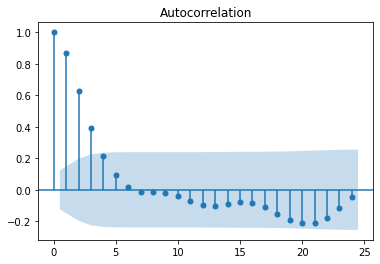

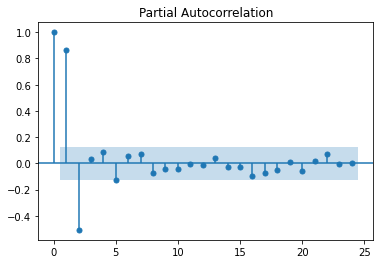

In [2]:

# ARMA(1,2)
# Fonte: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Ignorar warnings não prejudiciais
# 
import warnings
warnings.filterwarnings("ignore")

np.random.seed(12345)
arparams = np.array([.6])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 250) 
model = ARMA(y, (1,2)).fit(trend='nc', disp=0) # Exercício: Olhar o ajuste

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

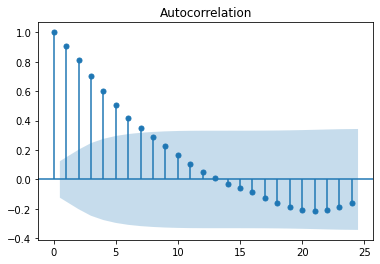

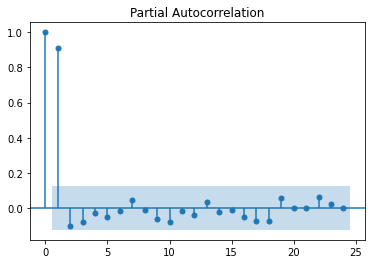

In [3]:
# ARMA(1,0) ou AR(1)

np.random.seed(12345)
arparams = np.array([.9])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] 
ma = np.r_[1] 
y = arma_generate_sample(ar, ma, 250) 
model = ARMA(y, (1,0)).fit(trend='nc', disp=0)
model.params

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

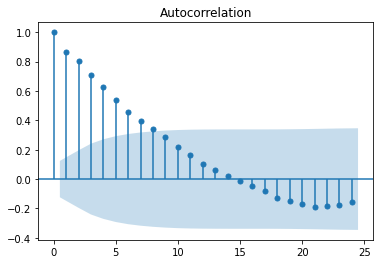

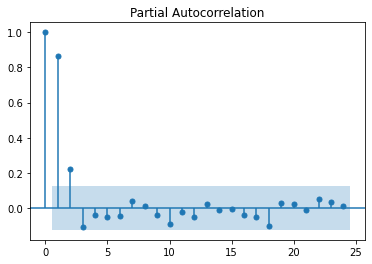

In [4]:
# ARMA(2,0) ou AR(2)
# Fonte: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

np.random.seed(12345)
arparams = np.array([.6, 0.3])
maparams = np.array([.8, .35])
ar = np.r_[1, -arparams] 
ma = np.r_[1]
y = arma_generate_sample(ar, ma, 250) 
model = ARMA(y, (2,0)).fit(trend='nc', disp=0)
model.params

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

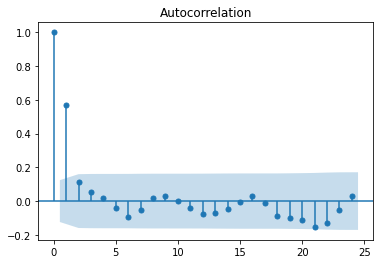

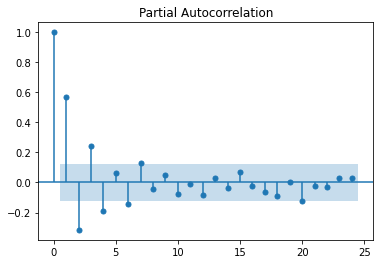

In [5]:
# ARMA(0,1) ou MA(1)

np.random.seed(12345)
arparams = np.array([.75])
maparams = np.array([.85])
ar = np.r_[1]
ma = np.r_[1, maparams] 
y = arma_generate_sample(ar, ma, 250) 
model = ARMA(y, (0, 1)).fit(trend='nc', disp=0)

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

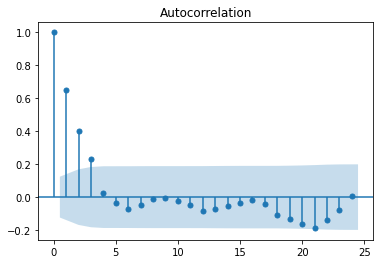

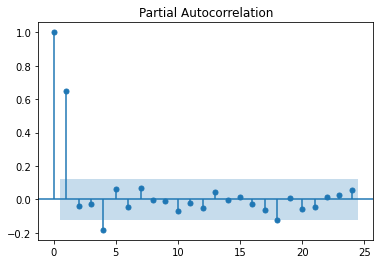

In [6]:
# ARMA(0,3) ou MA(3)
# Fonte: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

np.random.seed(12345)
arparams = np.array([.75])
maparams = np.array([.6, 0.3, 0.3])
ar = np.r_[1]
ma = np.r_[1, maparams] 
y = arma_generate_sample(ar, ma, 250) 
model = ARMA(y, (0, 3)).fit(trend='nc', disp=0)

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

## Aplicações

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

# Funções específicas para a modelagem e previsão
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)
#from pmdarima import auto_arima # Para determinar a ordem do ARIMA
import pmdarima as pm

# Carregue as bases de dados
# Trabalharemos com uma série estacionária, de nascimentos de mulheres, e uma série não estacionária, PETR4

# Dados de nascimentos diários de mulheres
df1 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'

# Dados de fechamento das ações da PETR4
df2 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/PETR4.csv',index_col='Date',parse_dates=True)
idx = pd.date_range(start=df2.index.min(), end=df2.index.max(), freq='B')
df2 = df2.reindex(idx)
df2.fillna(method='ffill', inplace=True)

## Média móvel autoregressiva - ARMA (p, q)

Olhemos a princípio uma série estacionária e determinaremos (p,q) em um modelo ARMA.


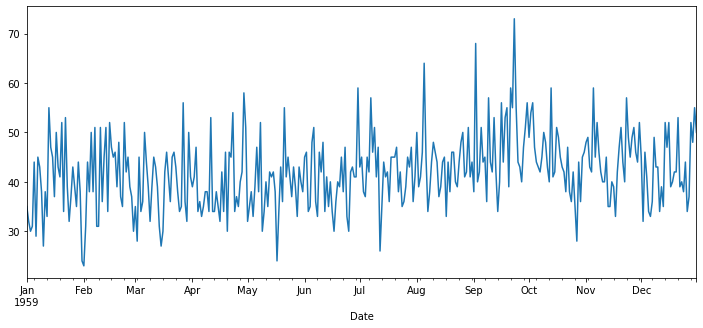

In [8]:
df1['Births'].plot(figsize=(12,5));

### Execute o teste Dickey-Fuller aumentado para confirmar a estacionariedade

In [9]:
# Teste de Dickey-Fuller aumentado
# fonte: https://machinelearningmastery.com/time-series-data-stationary-python/

result = adfuller(df1['Births'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))



ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Há fortes evidências de que a série seja estacionária ou tendência-estacionária.

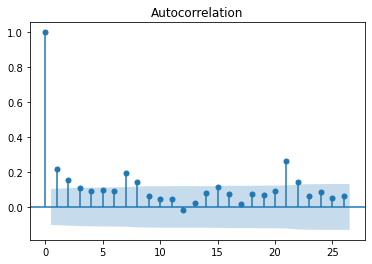

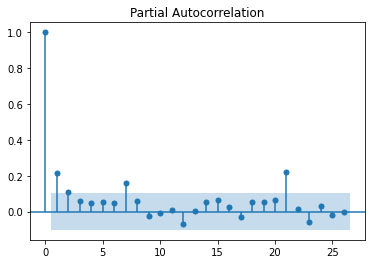

In [10]:
# Correlograma

plot_acf(df1['Births'])
plot_pacf(df1['Births'], method='ywm') # Método atualizado na nova versão
plt.show()

In [11]:
# Vamos considerar um modelo ARMA(p,q) e a função auto_arima 

In [12]:
# Novo comando para auto_arima a partir de pm (pmdarima)
stepwise_fit = pm.auto_arima(df1['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=0,
                          seasonal=False,
                          d=0, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3776.976, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2656.891, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3407.164, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2474.496, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2471.358, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2472.653, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2471.853, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2474.264, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.066 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1231.679
Date:                Mon, 18 Jul 2022   AIC                           2471.358
Time:                        23:50:33   BIC                           2486.957
Sample:                             0   HQIC                          2477.557
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1251      0.060     18.763      0.000       1.008       1.243
ar.L2         -0.1251      0.060     -2.087      0.037      -0.243      -0.008
ma.L1         -0.9623      0.017    -55.585      0.000      -0.996      -0.928
sigma2        49.1469      3.301     14.889      0.000      42.677      55.617
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                24.86
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Considere agora bases de treino e teste

In [13]:
len(df1)

365

In [14]:
treino = df1.iloc[:290]
teste = df1.iloc[290:]

In [15]:
# Ignorar warnings não prejudiciais
# 
import warnings
warnings.filterwarnings("ignore")

modelo = ARMA(treino['Births'],order=(2,1))
resultados = modelo.fit()
resultados.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39046D+00    |proj g|=  6.93698D-03

At iterate    5    f=  3.38482D+00    |proj g|=  5.71925D-03

At iterate   10    f=  3.38472D+00    |proj g|=  1.06404D-04

At iterate   15    f=  3.38471D+00    |proj g|=  5.77316D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   4.441D-08   3.385D+00
  F =   3.3847080910419005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  290
Model:                     ARMA(2, 1)   Log Likelihood                -981.565
Method:                       css-mle   S.D. of innovations              7.128
Date:                Mon, 18 Jul 2022   AIC                           1973.131
Time:                        23:50:33   BIC                           1991.480
Sample:                    01-01-1959   HQIC                          1980.482
                         - 10-17-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.3946      2.690     15.758      0.000      37.122      47.668
ar.L1.Births     1.0670      0.062     17.202      0.000       0.945       1.189
ar.L2.Births    -0.0723      0.061     -1.187      0.235      -0.192       0.047
ma.L1.Births    -0.9521      0.021    -46.207      0.000      -0.992      -0.912
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0057           +0.0000j            1.0057            0.0000
AR.2           13.7510           +0.0000j           13.7510            0.0000
MA.1            1.0503           +0.0000j            1.0503            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
# O melhor modelo obtido com esta versão do pmdarima foi ARMA(2,1). Com outra versão pode-se selecionar outro modelo como o melhor.

In [17]:
# Olhando as previsões

inicio=len(treino)
fim=len(treino)+len(teste)-1
previsoes = resultados.predict(start=inicio, end=fim).rename('Previsões ARMA(2,1)')

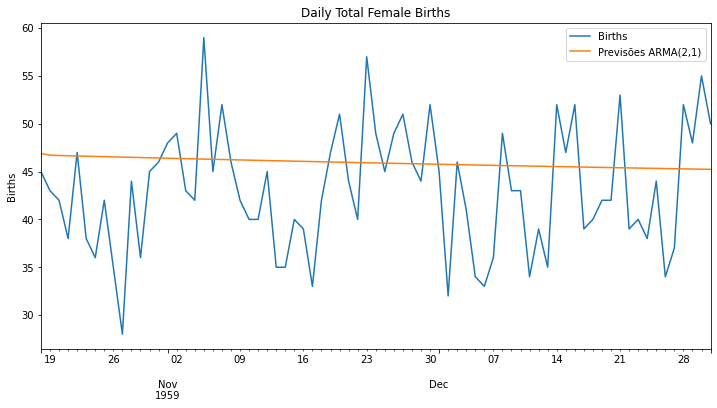

In [18]:
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' # we don't really need a label here

ax = teste['Births'].plot(legend=True,figsize=(12,6),title=title)
previsoes.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Como nosso conjunto de dados inicial não exibiu tendência ou componente sazonal, essa previsão faz sentido. Na próxima seção, tomaremos medidas adicionais para avaliar o desempenho de nossas previsões e fazer previsões para o futuro.

## Média móvel integrada autoregressiva - ARIMA (p, d, q)
As etapas são as mesmas que para o ARMA (p, q), exceto que aplicaremos um componente diferencial para tornar o conjunto de dados estacionário. <br>
Primeiro, vamos dar uma olhada no conjunto de dados PETR4.
### Plotar os dados de origem

[Text(0.5, 0, ''), Text(0, 0.5, 'Fechamentos')]

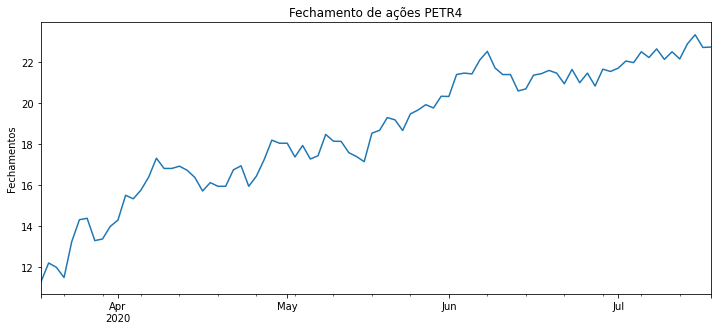

In [19]:
title = 'Fechamento de ações PETR4'
ylabel='Fechamentos'

ax = df2['Close'].plot(figsize=(12,5),title=title);
ax.set(xlabel=xlabel, ylabel=ylabel)


### Executar uma decomposição em tendência e sazonalidade

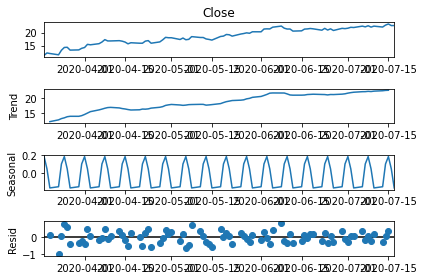

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Close'], model='additive' )  # model='add' also works
result.plot();

Possivelmente existe sazonalidade nesses dados. A princípio vamos considerar um modelo ARIMA não sazonal. 

Vamos usar o pdmarima.auto_arima para determinar o modelo ARIMA.



### Execute o teste Dickey-Fuller aumentado na primeira diferença

In [21]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff

result = adfuller(diff(df2['Close']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -10.506245
p-value: 0.000000
Critical Values:
	1%: -3.509
	5%: -2.896
	10%: -2.585


Isso confirma que atingimos a estacionariedade após a primeira diferença.
### Construa os gráficos ACF e PACF

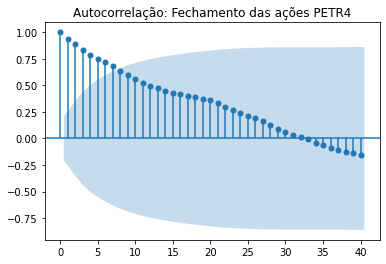

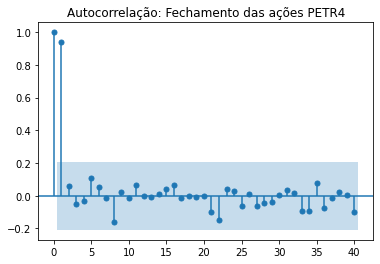

In [22]:
title = 'Autocorrelação: Fechamento das ações PETR4'
lags = 40
plot_acf(df2['Close'],title=title,lags=lags);
plot_pacf(df2['Close'],title=title,lags=lags, method='ywm'); # Método atualizado na nova versão
plt.show();

Vamos dar uma olhada no <tt> pmdarima.auto_arima </tt> feito com o stepwise_fit para ver se ter os termos $p$ e $q$ o mesmo ainda faz sentido:

In [23]:
stepwise_fit = pm.auto_arima(df2['Close'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=7,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=152.390, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=153.013, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=152.598, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=154.944, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=152.746, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.160 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -74.195
Date:                Mon, 18 Jul 2022   AIC                            152.390
Time:                        23:50:34   BIC                            157.322
Sample:                             0   HQIC                           154.376
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1316      0.062      2.124      0.034       0.010       0.253
sigma2         0.3223      0.053      6.046      0.000       0.218       0.427
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.24   Prob(JB):                         0.57
Heteroskedasticity (H):               0.57   Skew:                             0.25
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Vamos avaliar o modelo ARIMA (0,1,0) em bases de treino e teste


### Divida os dados em conjuntos de treino / teste

In [24]:
len(df2)

88

In [25]:
# Defina as bases de treino e teste
treino = df2.iloc[:70]
teste = df2.iloc[70:]

### Ajuste um modelo ARIMA (0,1,0) (versão antiga do statsmodels)

In [26]:
modelo = ARIMA(treino['Close'],order=(0,1,0))
resultados = modelo.fit()
resultados.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.89487D-01    |proj g|=  1.11022D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   0.000D+00   8.895D-01
  F =  0.88948729037543295     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   69
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -61.375
Method:                           css   S.D. of innovations              0.589
Date:                Mon, 18 Jul 2022   AIC                            126.749
Time:                        23:50:34   BIC                            131.217
Sample:                    03-19-2020   HQIC                           128.522
                         - 06-23-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1501      0.071      2.118      0.034       0.011       0.289
==============================================================================
"""

In [27]:
# Obtain predicted values
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsoes = resultados.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões ARIMA (0,1,0)')

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

<AxesSubplot:>

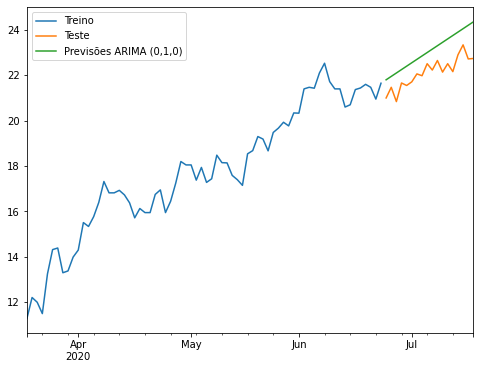

In [28]:
treino['Close'].plot(legend=True, label='Treino')
teste['Close'].plot(legend=True, label='Teste')
previsoes.plot(legend=True, figsize=(8,6))


### Treine novamente o modelo com os dados completos e preveja o futuro

In [29]:
modelo = ARIMA(df2['Close'],order=(0,1,0))
resultados = modelo.fit()
fcast = resultados.predict(len(df2),len(df2)+11,typ='levels').rename('Previsões ARIMA(0,1,0) ')

RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52814D-01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   8.528D-01
  F =  0.85281439479431664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


[Text(0.5, 0, ''), Text(0, 0.5, 'Fechamentos')]

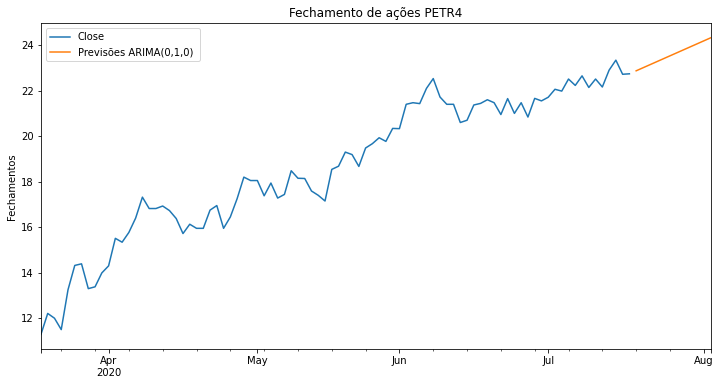

In [30]:
# Previsão
title = 'Fechamento de ações PETR4'
ylabel='Fechamentos'
xlabel=''

ax = df2['Close'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


## Atenção: Ajuste com o pacote statsmodels foi atualizado e leva a previsões diferentes

In [31]:
## Atenção! Nesta nova versão do statsmodels a previsão ficará diferente.

from statsmodels.tsa.arima.model import ARIMA

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

modelo = ARIMA(treino['Close'], order=(0,1,0))
resultados = modelo.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   70
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -63.547
Date:                Mon, 18 Jul 2022   AIC                            129.094
Time:                        23:50:35   BIC                            131.328
Sample:                    03-18-2020   HQIC                           129.981
                         - 06-23-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3694      0.063      5.876      0.000       0.246       0.493
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.80   Prob(JB):                         0.61
Heteroskedasticity (H):               0.53   Skew:                             0.26
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
# Obtain predicted values
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsoes = resultados.predict(start=inicio,end = fim, dynamic=False, typ='levels').rename('Previsões ARIMA (0,1,0)')

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

<AxesSubplot:>

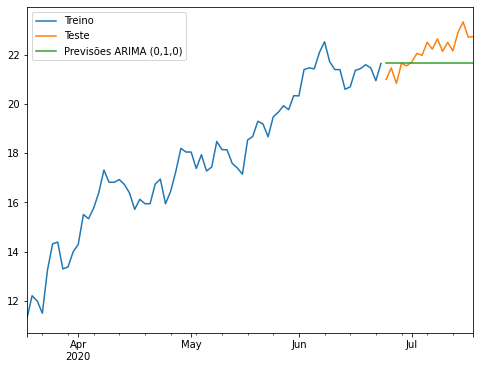

In [33]:
treino['Close'].plot(legend=True, label='Treino')
teste['Close'].plot(legend=True, label='Teste')
previsoes.plot(legend=True, figsize=(8,6))


### Treine novamente o modelo com os dados completos e preveja o futuro

In [34]:
modelo = ARIMA(df2['Close'],order=(0,1,0))
resultados = modelo.fit()
fcast = resultados.predict(len(df2),len(df2)+11,typ='levels').rename('Previsões ARIMA(0,1,0) ')

[Text(0.5, 0, ''), Text(0, 0.5, 'Fechamentos')]

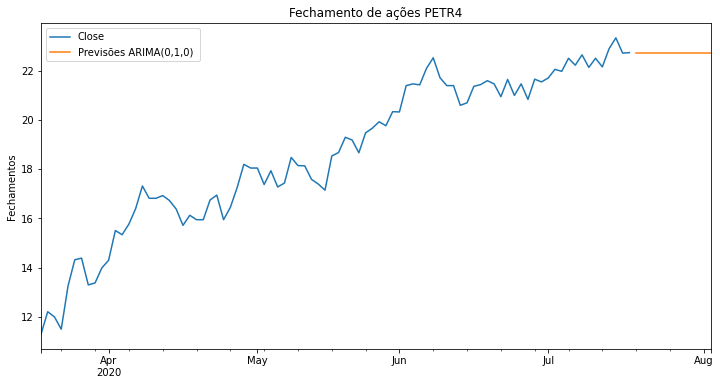

In [35]:
# Previsão
title = 'Fechamento de ações PETR4'
ylabel='Fechamentos'
xlabel=''

ax = df2['Close'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


**Como exercício, verifique se o ARIMA com sazonalidade traz previsões melhores para esses dados. Para isso, use seasonal=True no auto_arima.** 